<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 3</i></font></h1>

#### In this notebook we want to become more familiar with data visualization and classify data with Logistic Regression.

# Section 1: MNIST Dataset
You can find information about the dataset and download it from [here](https://www.kaggle.com/oddrationale/mnist-in-csv)(please download train dataset).


In [8]:
from sklearn.datasets import fetch_openml
import numpy as np

# This will take less than a minute to run.

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## Visualize Dataset
Define functions for each purpose:
1. plot a digit

<img src="images/digit.png" width="50" height="50">

2. plot a series of instances of each class

<img src="images/digits.png" width="300" height="300">
3. Plot a shifted digit

<img src="images/shift.png" width="300" height="70">

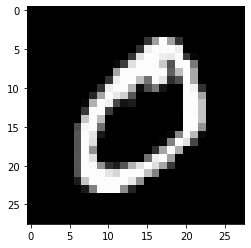

In [9]:
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randint
seed(10)
images = np.reshape(X,((len(X),28,28)))
plt.imshow(images[1],  cmap='gray')


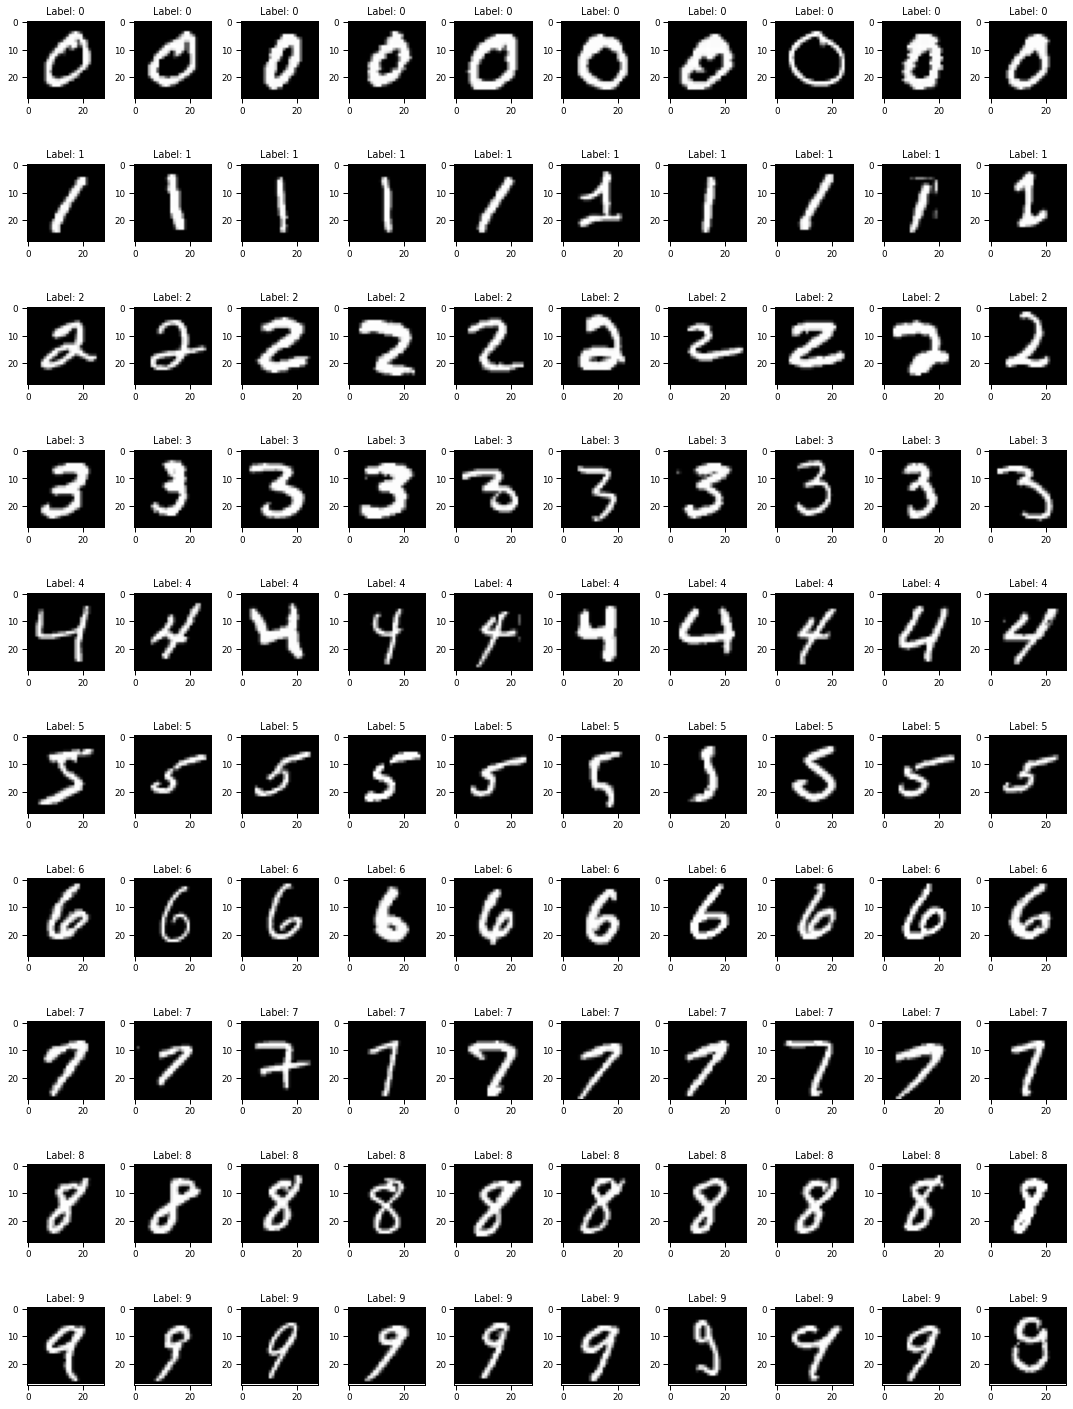

In [115]:
fig = plt.figure
num_row = 10
num_col = 10
num = 100
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
random_images = randint(0, len(images), num)
i = 0
unique_labels = np.unique(y)
for label in unique_labels:
    indices = np.where(y==label)[0][0:10]
    for ind in indices:
      ax = axes[i//num_col, i%num_col]
      ax.imshow(images[ind], cmap='gray')
      ax.set_title('Label: {}'.format(y[ind]))
      i = i + 1
plt.tight_layout()
plt.show()

In [139]:
def shift_image(X, dx, dy):
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = 0
        plt.imshow(X, cmap='gray')
        plt.title('Down')
    elif dy<0:
        X[dy:, :] = 0
        plt.imshow(X, cmap='gray')
        plt.title('Up')
    if dx>0:
        X[:, :dx] = 0
        plt.imshow(X, cmap='gray')
        plt.title('Right')
    elif dx<0:
        X[:, dx:] = 0
        plt.imshow(X, cmap='gray')
        plt.title('Left')
    plt.show()
    plt.close()
    


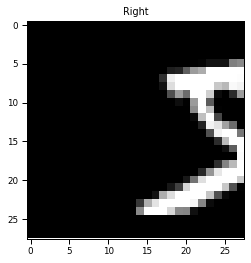

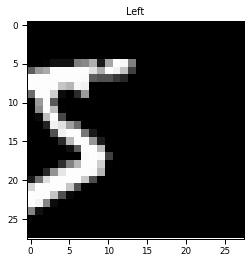

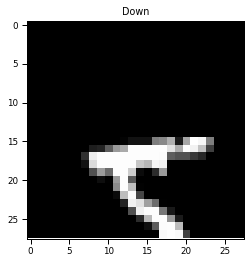

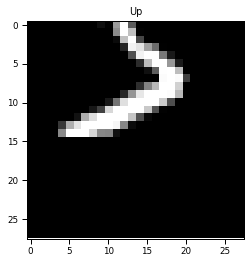

In [140]:
import cv2 
img = np.reshape(X,((len(X),28,28)))
shift_image(img[0], 10,0)
shift_image(img[0], -10,0)
shift_image(img[0], 0,10)
shift_image(img[0], 0,-10)


## Classification
In this part, you should do a binary classification to predict if a digit is '4' or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision and Recall.
3. Plot Recall vs Precision for different thresholds (using sklearn.metrics.precision_recall_curve) like the figures below:

<img src="images/rec_vs_pre1 .png" width="300" height="100">
<img src="images/rec_vs_pre2 .png" width="320" height="300">


In [4]:
from sklearn.model_selection import train_test_split

labels = np.copy(y)
labels[labels!='4'] = False
labels[labels=='4'] = True
labels = np.asarray(labels, dtype = np.bool)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))
confusion_mtx = confusion_matrix(y_test, y_pred)

The accuracy of the model is: 98.3%


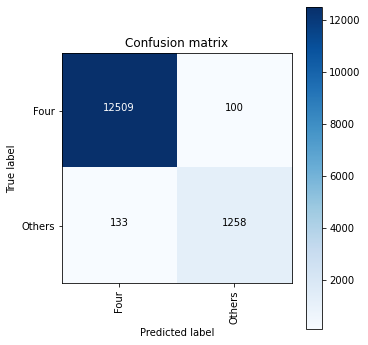

In [9]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)
class_names = ['Four', "Others"]
plot_confusion_matrix(confusion_mtx, class_names)


In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC(y_test, y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

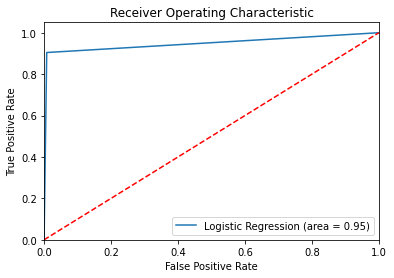

In [12]:
plot_ROC(y_test, y_pred)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     12609
        True       0.93      0.90      0.92      1391

    accuracy                           0.98     14000
   macro avg       0.96      0.95      0.95     14000
weighted avg       0.98      0.98      0.98     14000



**Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.**

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

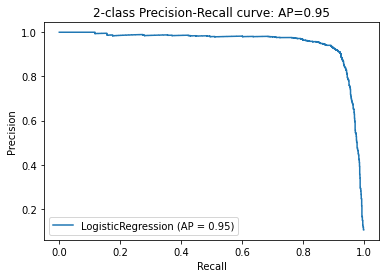

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(0.95))

# Section 2: Titanic Dataset

You can find information about the dataset and download it from [here](https://www.kaggle.com/c/titanic/data)(please download train dataset).


## Cleaning Dataset
Do some process and answer to questions below:

1. Which columns have missing values?
2. How do you fill the missing values, and why do you use this approach?

## Exploratory Data Analysis

Answer to these questions by plot relating figures:

1. Compare the age distribution for survivors and the deceased. Do you see any interesting points?
2. Compare the fare distribution for survivors and the deceased. Look at the features' description on Kaggle, is there any other feature that seems to be highly correlated to fare? Explain it.
3. Plot the survivors based on the embarked port. What do you see? Do you have any hypothesis? 
4. Plot data based on traveling alone and with family (you may need to merge 2 columns of data somehow).
5. Which gender was more likely to survive? Do you know why?

In [10]:
import pandas as pd
train_data = pd.read_csv("/content/drive/MyDrive/HO 3/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/HO 3/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/HO 3/gender_submission.csv")

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**As we can see, "Embarked", "Cabin", "Age" have missing values.**
**In "Embark" clomun,we have only two missing value. We can fill the missing values with median.**
**In "Age" column, we use median again, because it has less effect on our data.**
**In "Cabin" we lost lots of values. it seems, average be a better choice**

In [12]:
from scipy import stats
embark_mode = stats.mode(train_data['Embarked'])
cabin_mode = stats.mode(train_data['Cabin'])
train_data['Embarked'].fillna(embark_mode[0][0], inplace=True)
train_data['Cabin'].fillna(cabin_mode[0][0], inplace=True)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

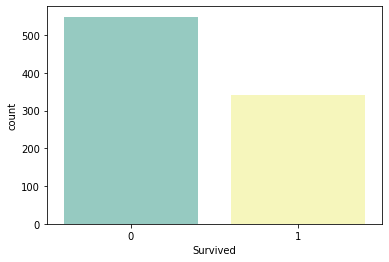

In [13]:
import seaborn as sns

sns.countplot(x='Survived', data=train_data, palette="Set3")
plt.show()

**P1: It seems 1/3 of passangers survived and 2/3 of them deceased**

In [14]:
def plot_dist_diagram(attr, x_bound,y_bound, train_data):
    plt.hist(train_data[attr].values, color='y')
    plt.gca().set(title= "All Passangers " + attr + " Dist", ylabel='Number')
    plt.xlim(0,x_bound)
    plt.ylim(0,y_bound)
    plt.show()
    plt.close()
    plt.hist((train_data[train_data['Survived'] == 1])[attr].values, color='b', label='Survived')
    plt.gca().set(title="Survived Passangers " +attr+ " Dist", ylabel='Number')
    plt.xlim(0,x_bound)
    plt.ylim(0,y_bound)
    plt.legend()
    plt.show()
    plt.close()
    plt.hist((train_data[train_data['Survived'] == 0])[attr].values, color='r', label='Deceased')
    plt.gca().set(title= "Deceased Passangers " + attr + " Dist", ylabel='Number')
    plt.xlim(0,x_bound)
    plt.ylim(0,y_bound)
    plt.legend()
    plt.show()
    plt.close()
    plt.hist((train_data[train_data['Survived'] == 1])[attr].values, color='b', label='Survived')
    plt.hist((train_data[train_data['Survived'] == 0])[attr].values, color='r', label='Deceased')
    plt.gca().set(title= "Passangers " + attr +  " Dist", ylabel='Number')
    plt.xlim(0,x_bound)
    plt.ylim(0,y_bound)
    plt.legend()
    plt.show()
    plt.close()

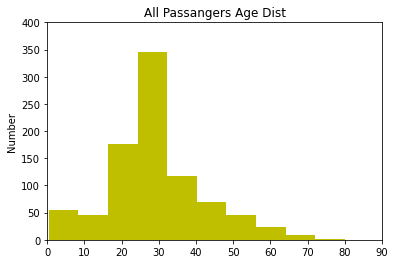

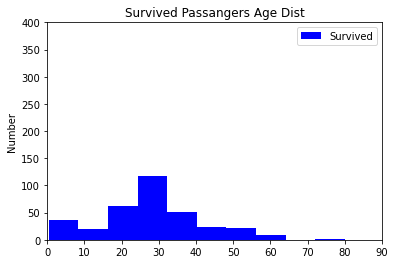

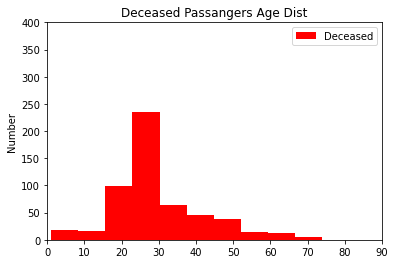

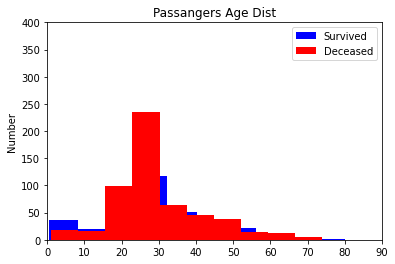

In [15]:
plot_dist_diagram("Age", 90, 400, train_data)

**Based on these diagrams we can see some noticble points. First, it seems most of childerns(0-10 years old) has been survived. Also number of pepole who are about 30-32 and survived are much higher than decesead. Also we can see a big differnce between number of survivals and decessead passangers in 20-30 passangeres. It seems most of young pepoles did not survived.**

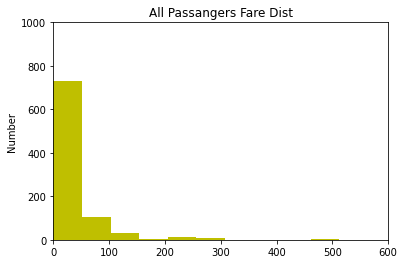

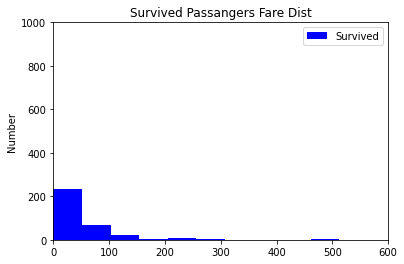

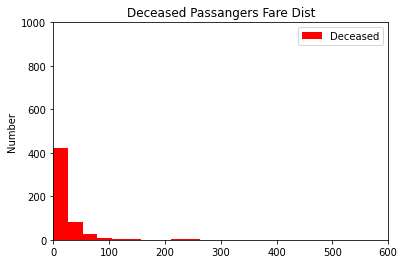

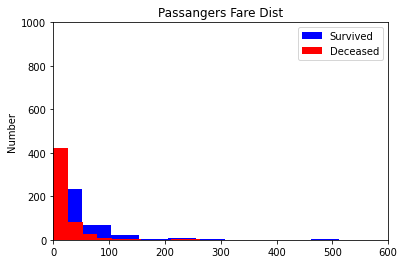

In [16]:
plot_dist_diagram("Fare", 600, 1000, train_data)

**We can see, for ones who paid more fare, has a great chance of survival. "Fare" has an obvious correlation with "Pclass".**

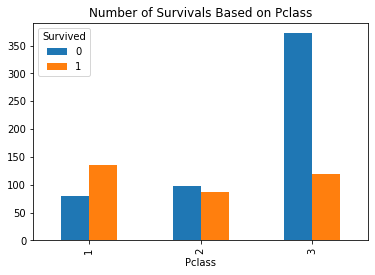

In [17]:
pd.crosstab(train_data["Pclass"],train_data['Survived']).plot(kind='bar')
plt.title('Number of Survivals Based on Pclass')
plt.xlabel('Pclass')
plt.show()

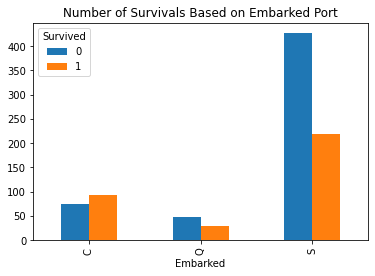

In [18]:
pd.crosstab(train_data["Embarked"],train_data['Survived']).plot(kind='bar')
plt.title('Number of Survivals Based on Embarked Port')
plt.xlabel('Embarked')
plt.show()

In [19]:
train_data['Embarked'] = train_data['Embarked'].replace({'C':0, 'Q':1, 'S':2})

**We can see most of passangers have been embarked from S port. Also we can see people embarked in C, Q have more chance of survival than peole from S. Also people in C have more than 50% percent of survival. I guess passangers from C were important passangeres.**

In [33]:
train_data['Alone'] = True
#train_data[train_data['SibSp'] ==1, 'Alone'] = False
#train_data[train_data['SibSp'] ==1]['Alone'] = False
train_data.loc[(train_data.SibSp >0),'Alone']=False
train_data.loc[(train_data.Parch >0),'Alone']=False
train_data['Alone']

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Alone, Length: 891, dtype: bool

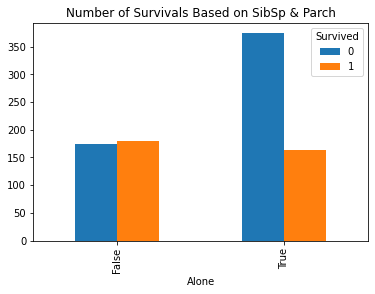

In [35]:
pd.crosstab(train_data["Alone"],train_data['Survived']).plot(kind='bar')
plt.title('Number of Survivals Based on SibSp & Parch')
plt.xlabel('Alone')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


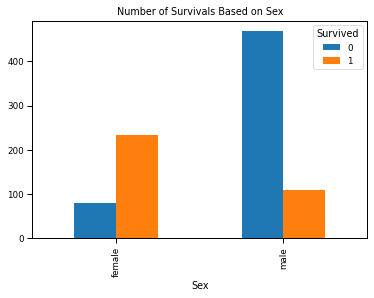

In [54]:
pd.crosstab(train_data["Sex"],train_data['Survived']).plot(kind='bar')
plt.title('Number of Survivals Based on Sex')
plt.xlabel('Sex')
plt.show()

In [57]:
train_data['Sex'] = train_data['Sex'].replace({'male':0, 'female':1})

**We can see women have more chance to survive. I guess pepole decide to survive women and children at frist and then think about men.**

## Classification
n this part, you should do a binary classification to predict if a passenger survives or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision, and Recall.
-------------------------------------------------------------------------------------------------------------------------------
* Like the explanation notebook, do the necessary preprocess transformation on the dataset and report what you have done.  You get a bonus mark if you use dimension reduction techniques.

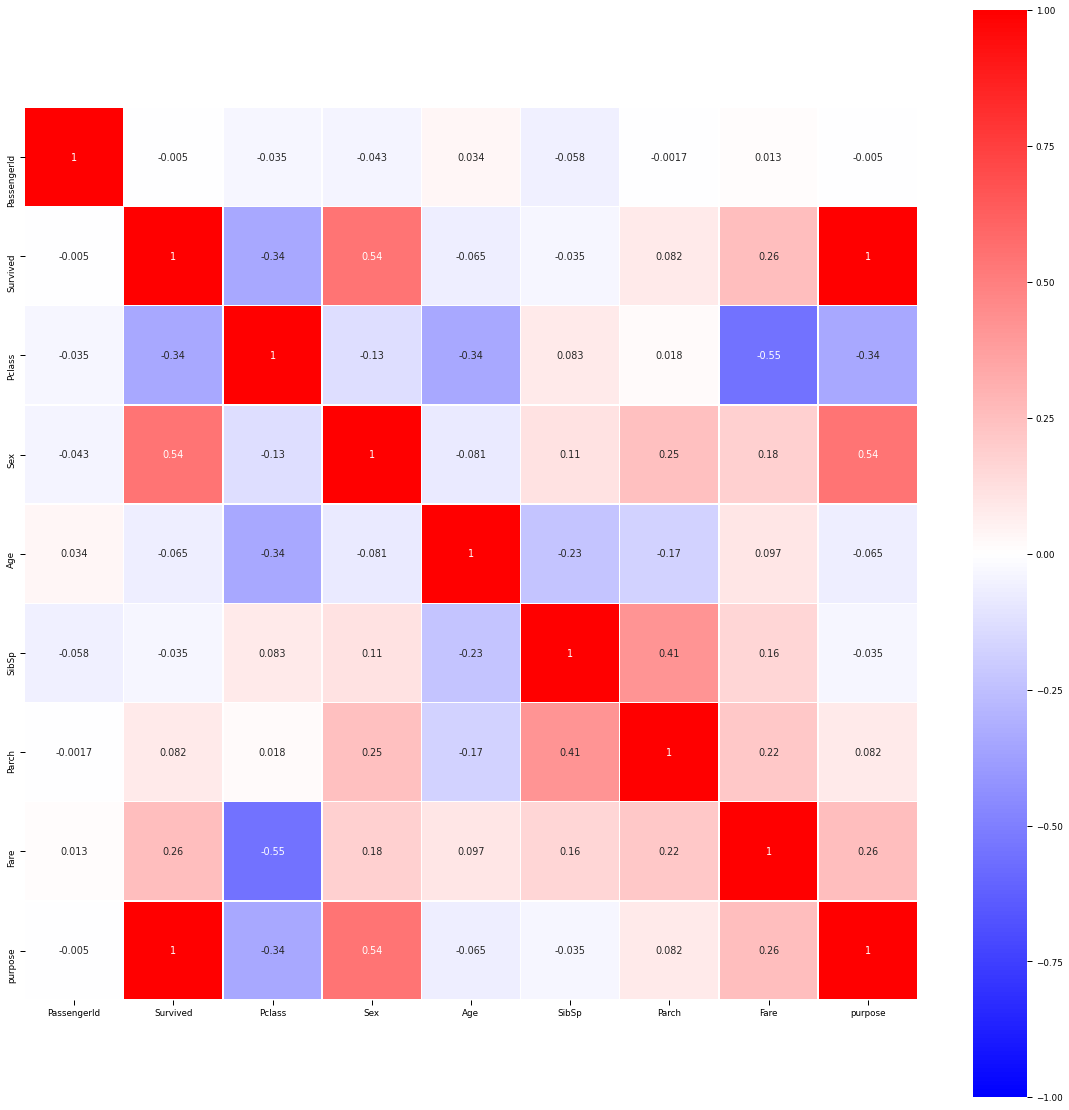

In [58]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(train_data.assign(purpose=train_data.Survived.astype('category').cat.codes,).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.show()

In [71]:
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import PolynomialFeaturesfrom, StandardScaler, OneHotEncoder

In [98]:
categorical_features = ['Pclass'] #dummy variable

categorical_transformer = Pipeline(steps=[('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])

In [99]:
numeric_features = ['Fare','Age', 'Sex'] #dummy variable

numeric_transformer = Pipeline(steps=[('poly',preprocessing.PolynomialFeatures(degree = 2)),
                                      ('scaler', preprocessing.StandardScaler())])

In [100]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [102]:
Y = train_data['Survived']
X = train_data[["Fare", "Age",'Pclass', 'Sex']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [103]:
smt = SMOTE(random_state=42)
lor = LogisticRegression(max_iter= 2000)

In [104]:
classifier = Pipeline([('preprocessor', preprocessor),('smt', smt), ('lor', LogisticRegression())])
classifier.fit(X_train, y_train);
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [105]:
print("The accuracy of model is {0:0.2f} ".format((accuracy_score(y_test, y_pred))))

The accuracy of model is 0.81 


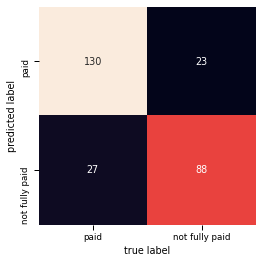

In [106]:
labels = ['paid', 'not fully paid']
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels , yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       157
           1       0.77      0.79      0.78       111

    accuracy                           0.81       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.81      0.81      0.81       268



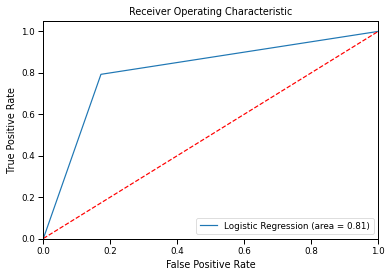

In [108]:
plot_ROC(y_test, y_pred)